## Example Evaluation - Customized Uncertainty Quantification of Parking Duration Predictions
Using example data, this notebook demonstrates the code used to replicate the customized error metrics and plots used in our paper.

In [1]:
#First Import Data
import pandas as pd
import numpy as np

from result_plots.plot_cdf import plot_cdf_parametric, plot_cdf_non_parametric
from error_metrics.pi_errors import calculate_error_outside_and_width
from error_metrics.integral_errors import integral_error_parametric, integral_error_non_parametric
from result_plots.plot_integral_errors import plot_integral_error
from error_metrics.critical_errors import calculate_security_levels
from result_plots.plot_security_levels import plot_security_levels

### Load Data
Before we consider the evaluation, we first load the example data

In [2]:
df_observations = pd.read_csv("example_Data/Example_observations.csv",index_col=0)
df_parametric = pd.read_csv("example_Data/Example_results_parametric.csv",index_col=0)
df_non_parametric = pd.read_csv("example_Data/Example_results_non_parametric.csv",index_col=0)

## Plot the Predicted and Observed CDF
The first plot we consider is a comparison of the predicted and observed CDF for the example data

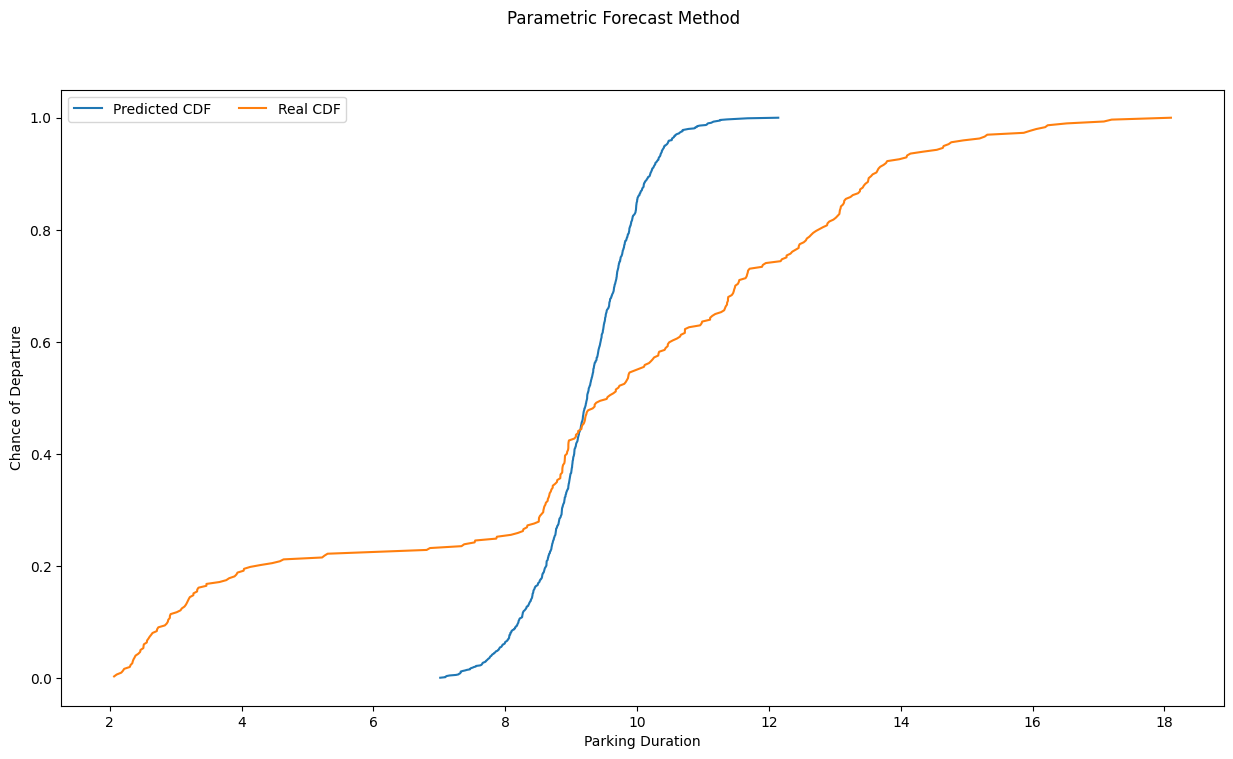

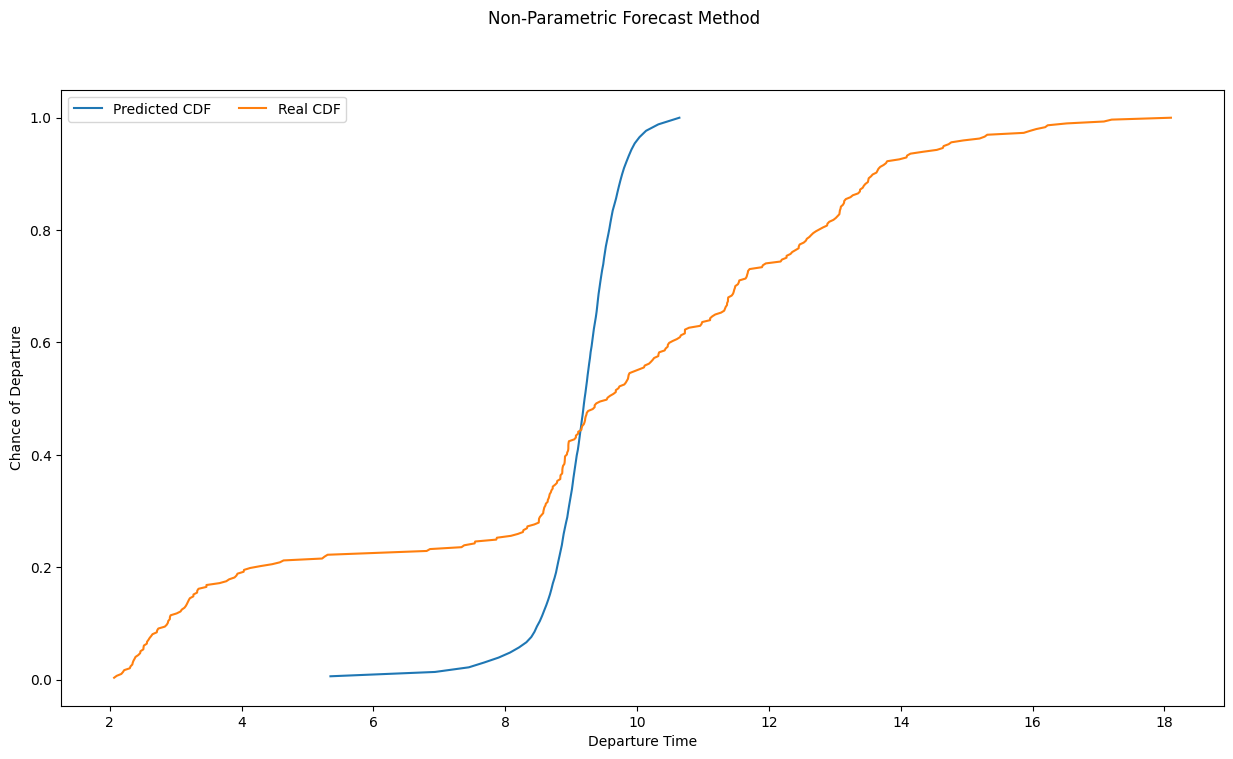

In [3]:
cdf_plot_parametric = plot_cdf_parametric(parametric_predictions=df_parametric,
                                          observations=df_observations,
                                          x_axis="Parking Duration")

cdf_plot_non_parametric = plot_cdf_non_parametric(non_parametric_predictions=df_non_parametric,
                                                  observations=df_observations,
                                                  x_axis="Departure Time")

## Error Outside Prediction Interval
In the next step we calculate the error outside the prediction interval and the width of this prediction interval for both models

In [4]:
considered_prediction_intervals = np.arange(10, 100, 10)
prediction_interval_stats_parametric = calculate_error_outside_and_width(predictions=df_parametric,
                                                                         observations=df_observations,
                                                                         considered_prediction_intervals=considered_prediction_intervals,
                                                                         is_parametric=True)
prediction_interval_stats_non_parametric = calculate_error_outside_and_width(predictions=df_non_parametric,
                                                                             observations=df_observations,
                                                                             considered_prediction_intervals=considered_prediction_intervals,
                                                                             is_parametric=False)

In [5]:
# Consider the parametric data frame
prediction_interval_stats_parametric

,Mean Error Outside Prediction Interval,Mean Prediction Interval Width
10,0.440134,0.185412
20,0.378578,0.37381
30,0.330518,0.568535
40,0.285991,0.773746
50,0.244661,0.995201
60,0.203628,1.241801
70,0.163883,1.529244
80,0.123775,1.890912
90,0.077143,2.42696


In [6]:
# Consider the non parametric data frame
prediction_interval_stats_non_parametric

,Mean Error Outside Prediction Interval,Mean Prediction Interval Width
10,0.516193,0.114126
20,0.463483,0.235812
30,0.412593,0.36244
40,0.359878,0.494999
50,0.306348,0.645955
60,0.263715,0.815014
70,0.221697,1.032682
80,0.168548,1.329408
90,0.112269,2.065427


## Integral Errors
We now consider the integral errors and the associated plots from our paper.

In [7]:
mean_integral_error_parametric = integral_error_parametric(parametric_predictions=df_parametric,
                                                           observations=df_observations)
mean_integral_error_non_parametric = integral_error_non_parametric(non_parametric_predictions=df_non_parametric,
                                                                   observations=df_observations)

In [8]:
print(f"The mean integral error for the parametric model is = {mean_integral_error_parametric}")
print("------------------------------------")
print(f"The mean integral error for the non-parametric model is = {mean_integral_error_non_parametric}")

The mean integral error for the parametric model is = 2.472559012249037
------------------------------------
The mean integral error for the non-parametric model is = 2.6101383484937193


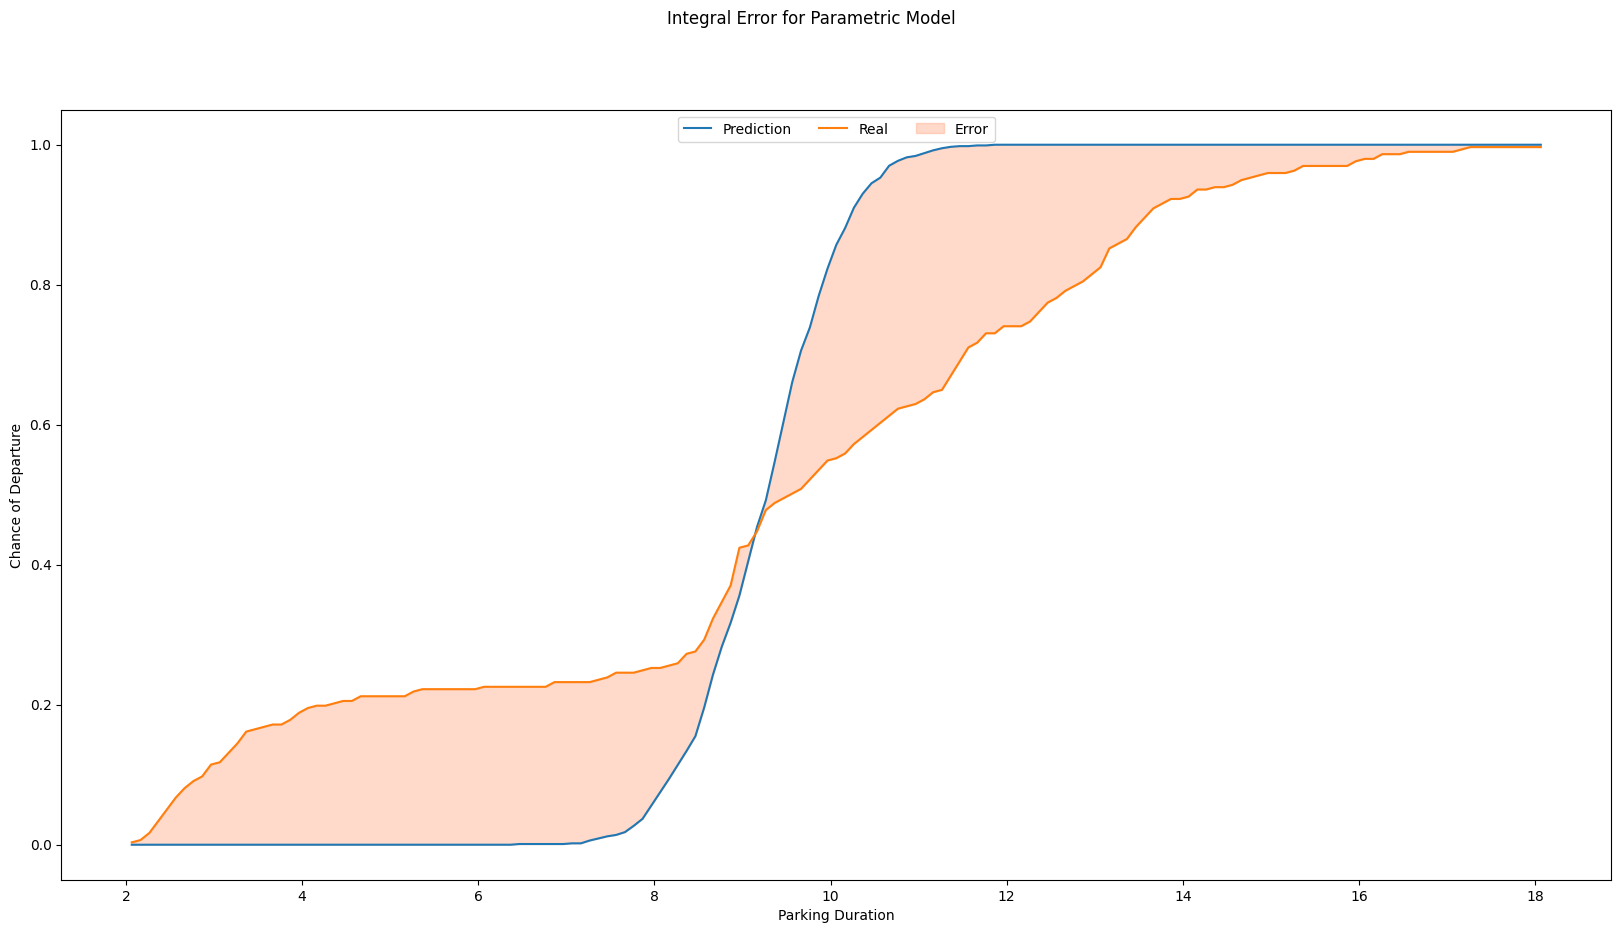

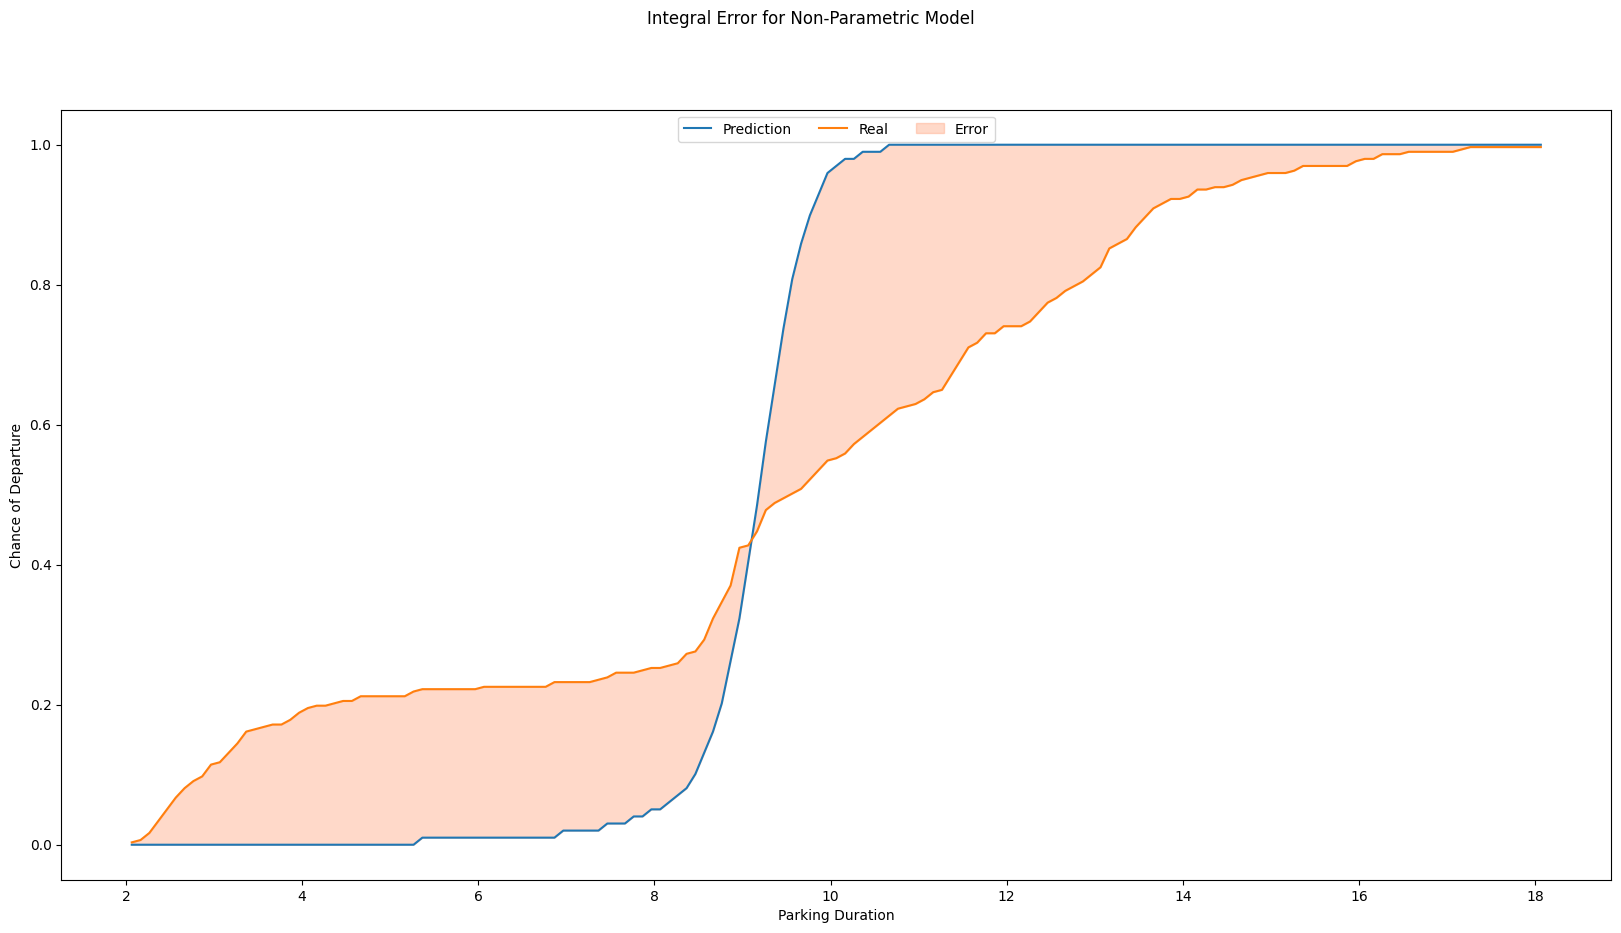

In [9]:
# Plot the integral errors
integral_plot_parametric = plot_integral_error(predictions=df_parametric,
                                               observations=df_observations,
                                               x_axis="Parking Duration",
                                               is_parametric=True)
integral_plot_non_parametric = plot_integral_error(predictions=df_non_parametric,
                                               observations=df_observations,
                                               x_axis="Parking Duration",
                                               is_parametric=False)

## Security Levels
We now calculate the critical error and non critical error for different security levels and plot these as in our paper.

In [10]:
considered_security_levels = np.arange(0.1, 1, 0.1)
security_level_df_parametric = calculate_security_levels(predictions=df_parametric,
                                                         observations=df_observations,
                                                         security_level_list=considered_security_levels,
                                                         is_parametric=True)
security_level_df_non_parametric = calculate_security_levels(predictions=df_non_parametric,
                                                             observations=df_observations,
                                                             security_level_list=considered_security_levels,
                                                             is_parametric=False)

In [11]:
# Consider the parametric data frame
security_level_df_parametric

,Critical Error,Non-Critical Error
0.1,0.979534,0.065274
0.2,0.697064,0.107359
0.3,0.506723,0.151046
0.4,0.355733,0.200024
0.5,0.244909,0.276105
0.6,0.178554,0.396655
0.7,0.134945,0.553014
0.8,0.096269,0.748365
0.9,0.058501,1.035153


In [12]:
# Consider the non-parametric data frame
security_level_df_non_parametric

,Critical Error,Non-Critical Error
0.1,0.633978,0.123747
0.2,0.47452,0.174705
0.3,0.37965,0.226191
0.4,0.307011,0.274692
0.5,0.245211,0.325193
0.6,0.188791,0.392284
0.7,0.133687,0.475227
0.8,0.089009,0.604209
0.9,0.044801,0.863977


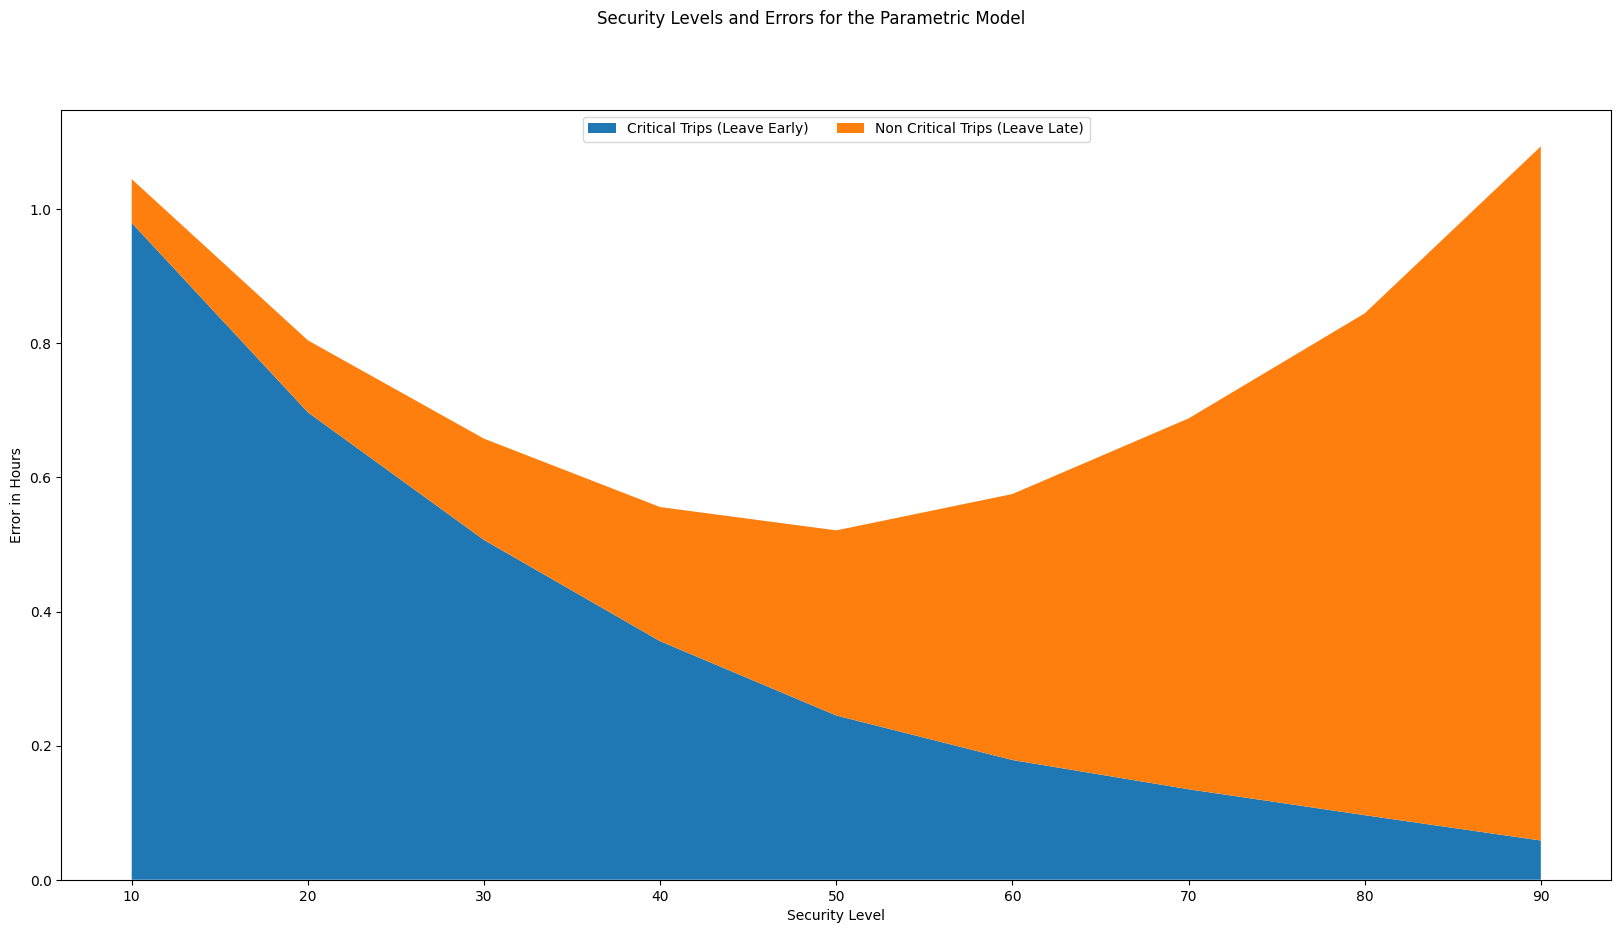

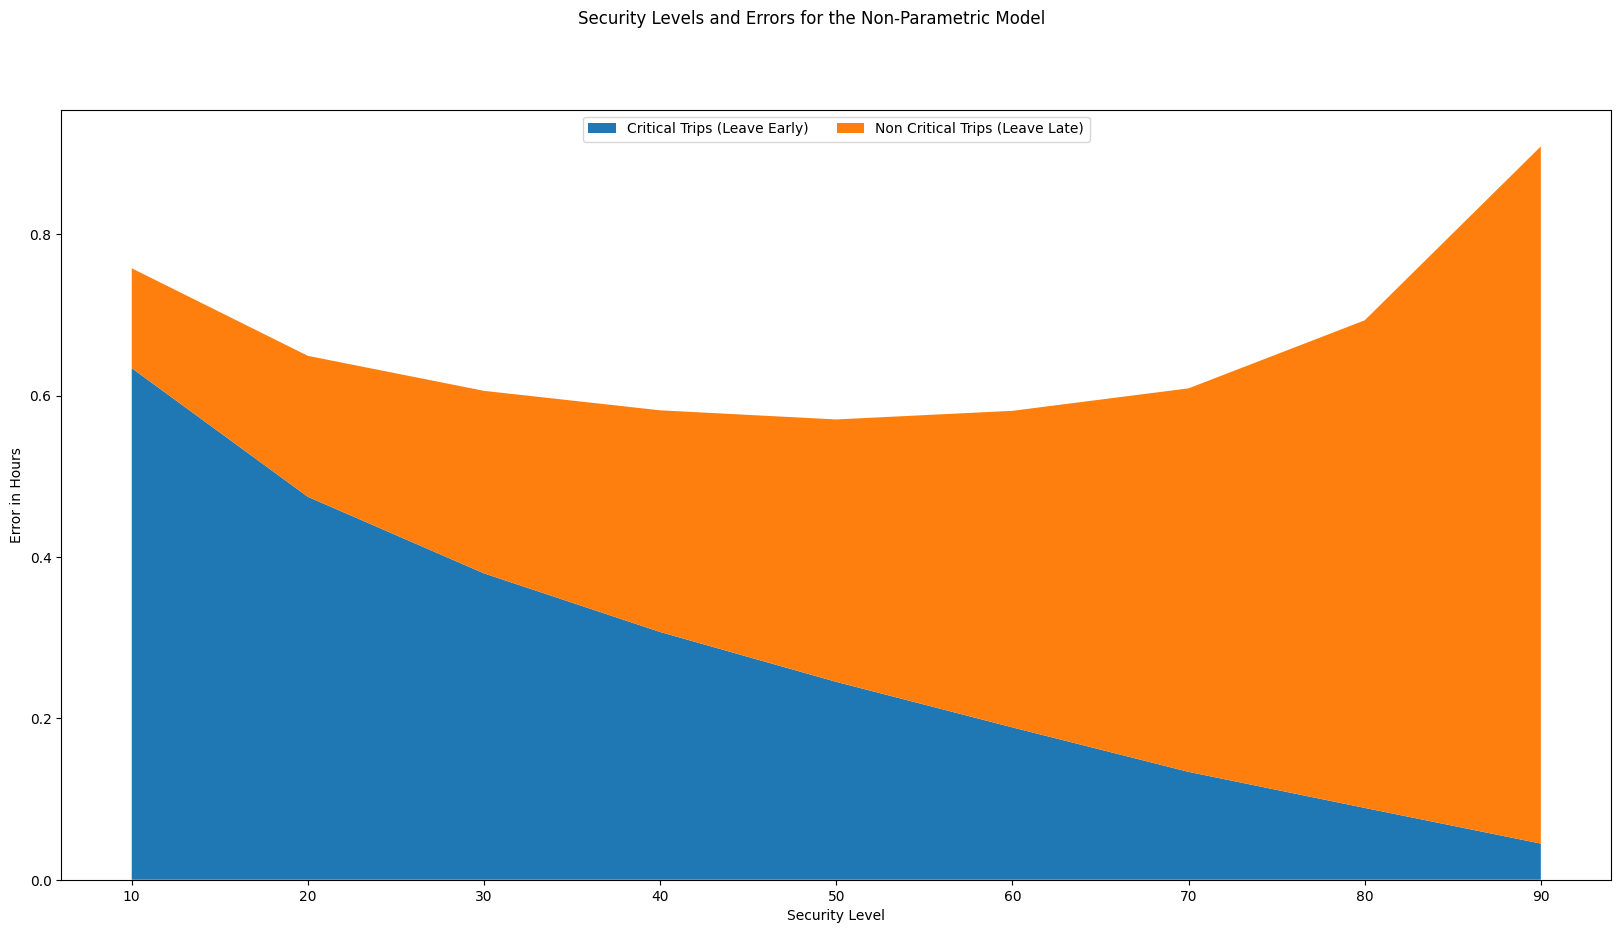

In [13]:
# Plot the security levels
security_level_plot_parametric = plot_security_levels(predictions=df_parametric,
                                                      observations=df_observations,
                                                      security_level_list=considered_security_levels,
                                                      is_parametric=True)
security_level_plot_non_parametric = plot_security_levels(predictions=df_non_parametric,
                                                          observations=df_observations,
                                                          security_level_list=considered_security_levels,
                                                          is_parametric=False)